<a href="https://colab.research.google.com/github/mennasherif14/AI-Project/blob/main/final_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
TRAIN_PATH = "/content/drive/MyDrive/ai project/finaldata_istg/train"
VAL_PATH   = "/content/drive/MyDrive/ai project/finaldata_istg/val"
TEST_PATH  = "/content/drive/MyDrive/ai project/finaldata_istg/test"

IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 30


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 880 images belonging to 10 classes.
Found 220 images belonging to 10 classes.
Found 220 images belonging to 10 classes.


In [ ]:
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Freeze base model initially
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,641,930 (94.00 MB)

 Trainable params: 1,054,218 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.3, min_lr=1e-6),
    ModelCheckpoint(
        "/content/drive/MyDrive/ai project/resnet50_best.h5",
        save_best_only=True,
        monitor="val_accuracy"
    )
]


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2019 - loss: 2.7611

28/28 ━━━━━━━━━━━━━━━━━━━━ 276s 9s/step - accuracy: 0.2046 - loss: 2.7452 - val_accuracy: 0.4636 - val_loss: 1.3910 - learning_rate: 0.0010
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.4089 - loss: 1.5841

28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 780ms/step - accuracy: 0.4096 - loss: 1.5816 - val_accuracy: 0.5136 - val_loss: 1.2622 - learning_rate: 0.0010
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.5655 - loss: 1.2095

28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 699ms/step - accuracy: 0.5649 - loss: 1.2102 - val_accuracy: 0.6000 - val_loss: 1.1264 - learning_rate: 0.0010
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.5773 - loss: 1.1076

28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 750ms/step - accuracy: 0.5775 - loss: 1.1067 - val_accuracy: 0.6273 - val_loss: 1.0084 - learning_rate: 0.0010
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.6375 - loss: 0.9781

28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 695ms/step - accuracy: 0.6381 - loss: 0.9762 - val_accuracy: 0.6500 - val_loss: 0.9412 - learning_rate: 0.0010
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 644ms/step - accuracy: 0.6972 - loss: 0.8473 - val_accuracy: 0.6455 - val_loss: 0.9527 - learning_rate: 0.0010
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.6792 - loss: 0.8772

28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 663ms/step - accuracy: 0.6797 - loss: 0.8764 - val_accuracy: 0.7136 - val_loss: 0.8874 - learning_rate: 0.0010
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 603ms/step - accuracy: 0.7081 - loss: 0.7408 - val_accuracy: 0.6636 - val_loss: 0.9455 - learning_rate: 0.0010
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 572ms/step - accuracy: 0.7673 - loss: 0.6732 - val_accuracy: 0.6818 - val_loss: 0.9721 - learning_rate: 0.0010
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 587ms/step - accuracy: 0.7861 - loss: 0.6159 - val_accuracy: 0.6909 - val_loss: 0.9196 - learning_rate: 0.0010
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 547ms/step - accuracy: 0.8220 - loss: 0.5442 - val_accuracy: 0.7000 - val_loss: 0.8896 - learning_rate: 3.0000e-04
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8150 - loss: 0.5354

28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 663ms/step - accuracy: 0.8152 - loss: 0.5345 - val_accuracy: 0.7273 - val_loss: 0.8194 - learning_rate: 3.0000e-04
Epoch 13/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 603ms/step - accuracy: 0.8777 - loss: 0.4295 - val_accuracy: 0.6955 - val_loss: 0.8495 - learning_rate: 3.0000e-04
Epoch 14/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 578ms/step - accuracy: 0.8638 - loss: 0.4253 - val_accuracy: 0.7273 - val_loss: 0.8354 - learning_rate: 3.0000e-04
Epoch 15/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 573ms/step - accuracy: 0.8187 - loss: 0.4936 - val_accuracy: 0.7273 - val_loss: 0.8090 - learning_rate: 3.0000e-04
Epoch 16/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.8389 - loss: 0.4569

28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 662ms/step - accuracy: 0.8395 - loss: 0.4559 - val_accuracy: 0.7318 - val_loss: 0.8115 - learning_rate: 3.0000e-04
Epoch 17/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.8845 - loss: 0.3991

28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 700ms/step - accuracy: 0.8842 - loss: 0.3994 - val_accuracy: 0.7455 - val_loss: 0.7926 - learning_rate: 3.0000e-04
Epoch 18/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 604ms/step - accuracy: 0.8881 - loss: 0.3575 - val_accuracy: 0.7318 - val_loss: 0.7908 - learning_rate: 3.0000e-04
Epoch 19/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.8831 - loss: 0.3692

28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 658ms/step - accuracy: 0.8828 - loss: 0.3698 - val_accuracy: 0.7727 - val_loss: 0.7602 - learning_rate: 3.0000e-04
Epoch 20/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 624ms/step - accuracy: 0.9025 - loss: 0.3322 - val_accuracy: 0.7455 - val_loss: 0.7668 - learning_rate: 3.0000e-04
Epoch 21/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 584ms/step - accuracy: 0.8790 - loss: 0.3633 - val_accuracy: 0.7727 - val_loss: 0.7669 - learning_rate: 3.0000e-04
Epoch 22/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 573ms/step - accuracy: 0.8940 - loss: 0.3211 - val_accuracy: 0.7545 - val_loss: 0.8012 - learning_rate: 3.0000e-04
Epoch 23/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 558ms/step - accuracy: 0.9005 - loss: 0.3285 - val_accuracy: 0.7682 - val_loss: 0.7717 - learning_rate: 9.0000e-05
Epoch 24/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 564ms/step - accuracy: 0.9154 - loss: 0.3048 - val_accuracy: 0.7727 - val_loss: 0.7871 - learning_rate: 9.0000e-05


In [ ]:
# Unfreeze last 50 layers
for layer in base_model.layers[-50:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

fine_tune_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=callbacks
)


Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7603 - loss: 0.6852 - val_accuracy: 0.6864 - val_loss: 1.0378 - learning_rate: 1.0000e-04
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 588ms/step - accuracy: 0.9086 - loss: 0.2692 - val_accuracy: 0.7318 - val_loss: 1.1337 - learning_rate: 1.0000e-04
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 603ms/step - accuracy: 0.9596 - loss: 0.1363 - val_accuracy: 0.7591 - val_loss: 0.8872 - learning_rate: 1.0000e-04
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.9717 - loss: 0.1033

28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 711ms/step - accuracy: 0.9717 - loss: 0.1034 - val_accuracy: 0.7864 - val_loss: 0.8234 - learning_rate: 1.0000e-04
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 868ms/step - accuracy: 0.9785 - loss: 0.0772 - val_accuracy: 0.7773 - val_loss: 0.8324 - learning_rate: 1.0000e-04
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.9813 - loss: 0.0597

28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 750ms/step - accuracy: 0.9813 - loss: 0.0600 - val_accuracy: 0.8045 - val_loss: 0.8202 - learning_rate: 1.0000e-04
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.9833 - loss: 0.0658

28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 952ms/step - accuracy: 0.9833 - loss: 0.0657 - val_accuracy: 0.8273 - val_loss: 0.7093 - learning_rate: 1.0000e-04
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - accuracy: 0.9952 - loss: 0.0395

28/28 ━━━━━━━━━━━━━━━━━━━━ 27s 960ms/step - accuracy: 0.9951 - loss: 0.0398 - val_accuracy: 0.8364 - val_loss: 0.7182 - learning_rate: 1.0000e-04
Epoch 9/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 790ms/step - accuracy: 0.9910 - loss: 0.0413 - val_accuracy: 0.8045 - val_loss: 0.8597 - learning_rate: 1.0000e-04
Epoch 10/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 573ms/step - accuracy: 0.9957 - loss: 0.0234 - val_accuracy: 0.8045 - val_loss: 0.7739 - learning_rate: 1.0000e-04
Epoch 11/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 569ms/step - accuracy: 0.9924 - loss: 0.0248 - val_accuracy: 0.8364 - val_loss: 0.7230 - learning_rate: 3.0000e-05
Epoch 12/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.9859 - loss: 0.0498

28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 877ms/step - accuracy: 0.9861 - loss: 0.0491 - val_accuracy: 0.8591 - val_loss: 0.6818 - learning_rate: 3.0000e-05
Epoch 13/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 618ms/step - accuracy: 0.9968 - loss: 0.0134 - val_accuracy: 0.8500 - val_loss: 0.6533 - learning_rate: 3.0000e-05
Epoch 14/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 624ms/step - accuracy: 0.9941 - loss: 0.0224 - val_accuracy: 0.8409 - val_loss: 0.7198 - learning_rate: 3.0000e-05
Epoch 15/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 577ms/step - accuracy: 0.9968 - loss: 0.0195 - val_accuracy: 0.8409 - val_loss: 0.6734 - learning_rate: 3.0000e-05


In [ ]:
test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 8s/step - accuracy: 0.8311 - loss: 0.7673
Test Accuracy: 0.8500000238418579


In [ ]:
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_names))


7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 922ms/step
                    precision    recall  f1-score   support

    Angelina Jolie       0.79      0.75      0.77        20
         Brad Pitt       0.83      0.75      0.79        20
 Jennifer Lawrence       0.80      0.80      0.80        20
       Johnny Depp       0.80      1.00      0.89        20
 Leonardo DiCaprio       0.81      0.85      0.83        20
   Natalie Portman       0.71      0.75      0.73        20
Scarlett Johansson       0.95      0.95      0.95        40
        Tom Cruise       0.93      0.70      0.80        20
         Tom Hanks       0.95      0.90      0.92        20
        Will Smith       0.86      0.95      0.90        20

          accuracy                           0.85       220
         macro avg       0.84      0.84      0.84       220
      weighted avg       0.85      0.85      0.85       220



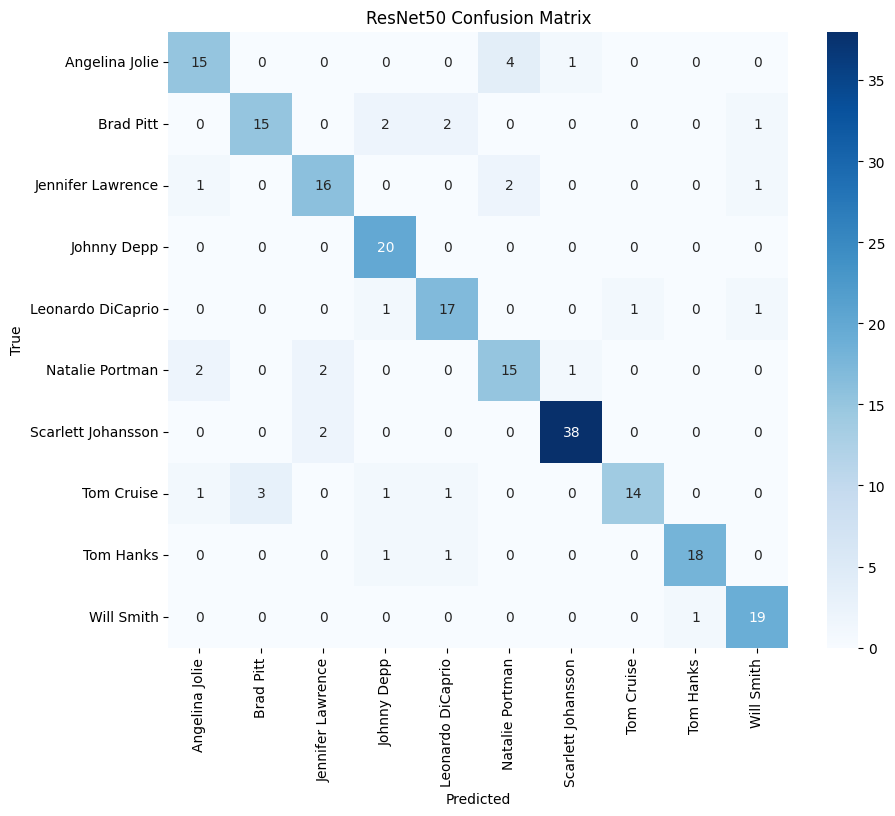

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("ResNet50 Confusion Matrix")
plt.show()


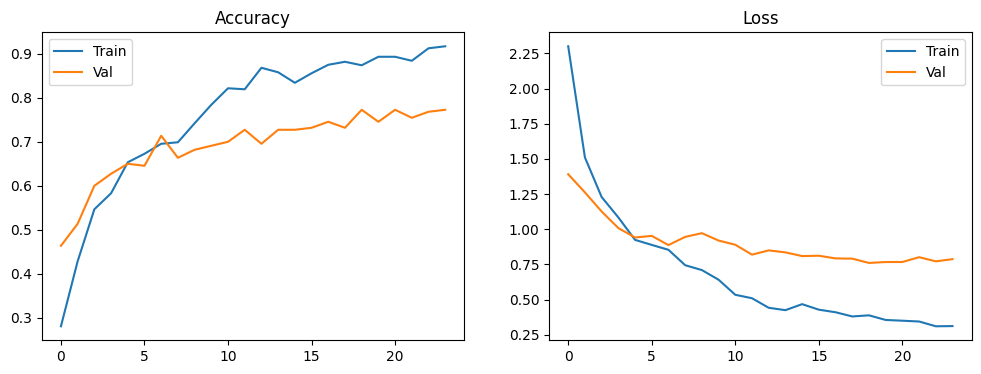

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.legend()

plt.show()


In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


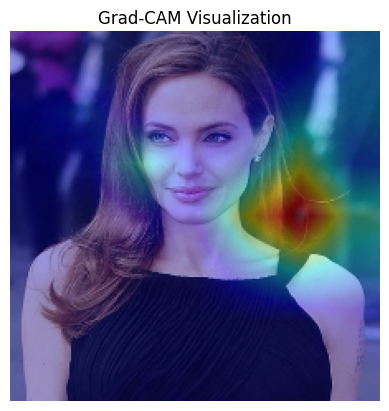

In [ ]:
import cv2

img_path = test_gen.filepaths[0]
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

heatmap = make_gradcam_heatmap(img_array, model, "conv5_block3_out")

img = cv2.imread(img_path)
img = cv2.resize(img, (224,224))
heatmap = cv2.resize(heatmap, (224,224))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM Visualization")
plt.axis("off")
plt.show()


In [ ]:
MODEL_SAVE_PATH = "/content/drive/MyDrive/ai project/resnet50_final_model.h5"

model.save(MODEL_SAVE_PATH)

